In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
import random
from numpy import hstack
from numpy.random import normal
from matplotlib import pyplot
import scipy.stats as stats

In [35]:
os.chdir('C:/Users/Evangelina Garza/Documents/CIMAT/MCE_2Semestre/Ciencia de Datos')

In [36]:
sns.set()
%matplotlib inline

## Caso univariado

### Funcion para obtener la densidad normal univariada

In [37]:
def my_unorm(Z,u,s):
    zi=(1/(s*((2*3.14159)**(0.5))))*(2.718281828459**(-0.5*((Z-u)**2)*(1/(s**2))))
    return zi

In [40]:
# Genera la muestra mixta
X1 = normal(loc=15, scale=1, size=50)
X2 = normal(loc=5, scale=2, size=30)
X = hstack((X1, X2))

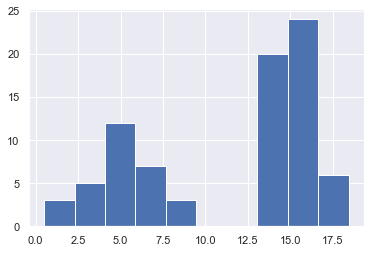

In [41]:
plt.hist(X)
plt.show()

#### Funcion que calcula los estimadores de medias, varianzas y la proporcion de un vector proveniente de un Modelo de mezclas Gaussianas, a partir del uso del algoritmo Estimation Maximization.

In [42]:
def my_em_gmm(X,pi):
    u1=X[0]
    u2=X[X.shape[0]-1]
    s1=1
    s2=1
    
    pi_n=pi
    pi_ant=0
    temp=0

    while abs(pi_ant-pi_n) > 0.001:
        
        X_norm1=my_unorm(X,u1,s1)
        X_norm2=my_unorm(X,u2,s2)
        
        pc1=(pi_n*X_norm1)
        pc2=((1-pi_n)*X_norm2)
        
        gi=pc1/(pc1+pc2)
        gi2=1-gi
        
        n1=sum(gi)
        n2=sum(gi2)
        
        u1=sum((gi*X))/n1
        u2=sum((gi2*X))/n2
        
        t1=(X-u1)**2
        t2=(X-u2)**2

        s1=sum((gi*t1))/n1
        s2=sum((gi2*t2))/n2
        
        if temp==0:
            pi_ant=pi
        else:
            pi_ant=pi_n
        
        pi_n=n1/X.shape[0]
        temp=temp+1
    
    c=[]
    for j in range(X.shape[0]):
        if gi[j]>gi2[j]:
            c.append(0)
        else:
            c.append(1)
        
    
    mu=np.array([u1,u2])
    ss=np.array([s1,s2])
    w_n=np.array([pi_n,(1-pi_n)])

    return mu,ss,w_n,c

In [56]:
#Aplicado al vector ejemplo que se genero previamente
media,var,pi,clas=my_em_gmm(X,0.5)

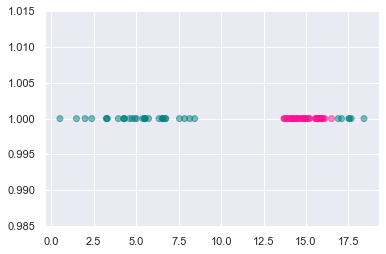

In [58]:
c_map = {0: 'deeppink', 1: 'teal', 2: 'violet'}
Y=np.ones(X.shape[0])
plt.scatter(X, Y, c=[c_map[_] for _ in clas], alpha=0.5)
plt.show()

### Caso multivariado

In [6]:
#Funcion de probabilidad normal para el caso bivariado
def my_vnorm(Z,u,E):
    E12=(np.linalg.det(E))**(-0.5)
    Einv=np.linalg.inv(E)
    x1=np.array([Z[0]-u[0],Z[1]-u[1]])
    x2=np.array([[Z[0]-u[0]],[Z[1]-u[1]]])
    t1=np.dot(x1,Einv)
    t2=-0.5*(np.dot(t1,x2))
    zi=(1/(2*3.14159))*E12*(2.718281828459**t2)
    return zi

In [75]:
#Conjunto de prueba
X_mv=np.array([[48,53,53,55,59,63,63,73,73,73,74,76,78,78,81,87,89,93,155,
               155,158,159,162,177],[81,84,86,86,88,82,85,89,92,92,80,92,98,99,85,88,87,87,115,117,
                115,118,124,132]])

In [76]:
#Funcion de implementacion 
def my_em_gmm_mv(X,pi):
    u1=X[:,0]
    u2=X[:,X.shape[1]-1]
    s1=np.array([[50,20],[20,15]])
    s2=np.array([[50,20],[20,15]])
    n=X.shape[1]
    
    pi_n=pi
    pi_ant=0
    temp=0

    while abs(pi_n-pi_ant)>0.0001:
        
        X_norm1=np.zeros(X.shape[1])
        X_norm2=np.zeros(X.shape[1])
        
        for i in range(X.shape[1]):
            X_norm1[i]=my_vnorm(X[:,i],u1,s1)
            X_norm2[i]=my_vnorm(X[:,i],u2,s2)
            
        pc1=pi_n*X_norm1
        pc2=(1-pi_n)*X_norm2
        
        gi=pc1/(pc1+pc2)
        gi2=pc2/(pc1+pc2)
        
        n1=sum(gi)
        n2=sum(gi2)
        
        u1=(np.dot(X,gi))/n1
        u2=(np.dot(X,gi2))/n2
        
        t1=(np.transpose(X)-u1)
        t2=(np.transpose(X)-u2)
        
        if temp==0:
            pi_ant=pi
            s1=np.array([np.zeros(X.shape[0]),np.zeros(X.shape[0])])
            s2=np.array([np.zeros(X.shape[0]),np.zeros(X.shape[0])])
            
            for j in range(X.shape[1]):
                st1=(X[:,j]-u1)
                st2=np.array([[st1[0]],[st1[1]]])
                st3=(X[:,j]-u2)
                st4=np.array([[st3[0]],[st3[1]]])
                s1=s1+(gi[j]*st1*st2)
                s2=s2+(gi2[j]*st3*st4)
        else:
            pi_ant=pi_n
        
        pi_n=n1/n
        temp=temp+1
    
    c=[]
    for j in range(X.shape[1]):
        if gi[j]>gi2[j]:
            c.append(0)
        else:
            c.append(1)
    
    mu=np.array([u1,u2])
    ss=np.array([s1,s2])
    w_n=np.array([pi_n,(1-pi_n)])

    return mu,ss,w_n,c

In [77]:
media,var,prop,clas=my_em_gmm_mv(X_mv,0.5)
media

array([[ 71.94863624,  88.33383732],
       [161.11200846, 120.26144506]])

In [78]:
var

array([[[3008.5       ,  462.5       ],
        [ 462.5       ,  462.5       ]],

       [[ 342.        ,  263.        ],
        [ 263.        ,  222.83333333]]])

In [79]:
prop

array([0.7624993, 0.2375007])

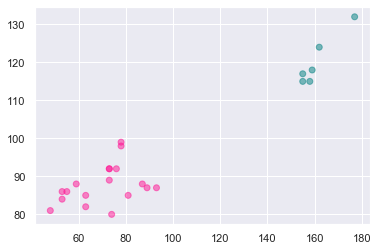

In [80]:
c_map = {0: 'deeppink', 1: 'teal', 2: 'violet'}

plt.scatter(X_mv[0,:], X_mv[1,:], c=[c_map[_] for _ in clas], alpha=0.5)
plt.show()

In [87]:
#pip install sklearn-extensions

  Created wheel for sklearn-extensions: filename=sklearn_extensions-0.0.2-py2.py3-none-any.whl size=24582 sha256=d1adf96bb8e066d25aace34b0f8054b1c8b9bd14829296db2d561f549f0de348
  Stored in directory: C:\Users\Evangelina Garza\AppData\Local\pip\Cache\wheels\b5\26\b2\09100728168b45e4de834b943a588028744fdfaa9ac979ffb2
Successfully built sklearn-extensions
Note: you may need to restart the kernel to use updated packages.


In [93]:
from sklearn_extensions.fuzzy_kmeans import KMedians, FuzzyKMeans
X_mvt=np.transpose(X_mv)

fuzzy_kmeans=FuzzyKMeans(k=2)
fuzzy_kmeans.fit(X_mvt)

FuzzyKMeans(k=2, m=2, max_iter=100, random_state=0, tol=0.0001)

In [95]:
clasi=fuzzy_kmeans.labels_

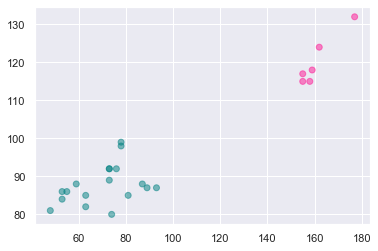

In [96]:
c_map = {0: 'deeppink', 1: 'teal', 2: 'violet'}

plt.scatter(X_mv[0,:], X_mv[1,:], c=[c_map[_] for _ in clasi], alpha=0.5)
plt.show()

<Figure size 432x288 with 0 Axes>

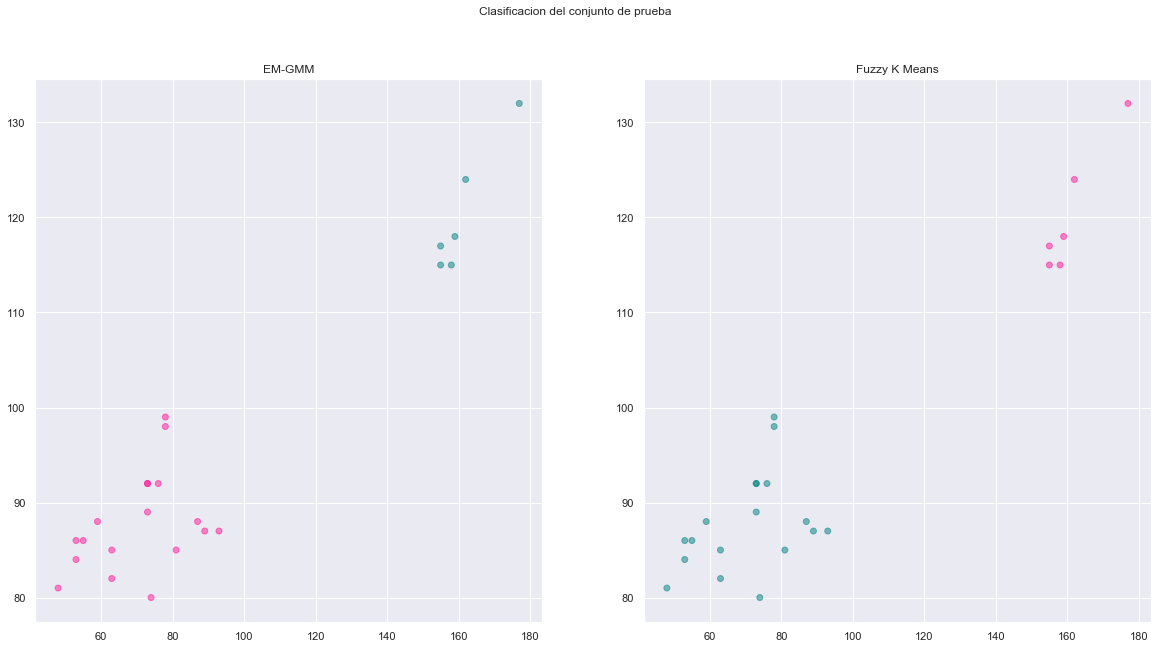

In [110]:
fig = plt.figure() 
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(20,10))

fig.suptitle('Clasificacion del conjunto de prueba')
axes[0].scatter(X_mv[0,:], X_mv[1,:], c=[c_map[_] for _ in clas], alpha=0.5)
axes[0].title.set_text('EM-GMM')
axes[1].scatter(X_mv[0,:], X_mv[1,:], c=[c_map[_] for _ in clasi], alpha=0.5)
axes[1].title.set_text('Fuzzy K Means')